# CS5530 - Assignment 2

This is Odai's submission for assignment 2.

The data file df.csv contains data of 768 patients. In this data there are 8 attributes
(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, dfPedigreeFunction, and Age)
and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the
outcome is df and 0 means no diabetes). For this assignment purposes we will consider this data
as a population. Use this data to perform the following:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Task A

Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.

In [5]:
# Set seed for reproducibility
np.random.seed(123)

# Take a random sample of 25 observations
sample = df.sample(n=25)

# Calculate mean and maximum glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Calculate mean and maximum glucose values of the population
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

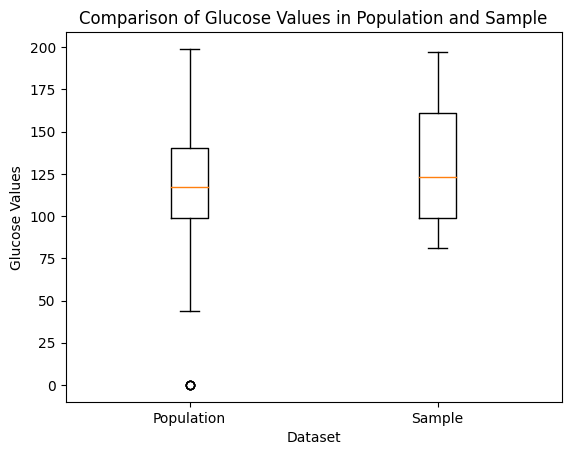

In [4]:
# Create boxplot of glucose values in population and sample
fig, ax = plt.subplots()
ax.boxplot([df['Glucose'], sample['Glucose']], labels=['Population', 'Sample'])
ax.set_title('Comparison of Glucose Values in Population and Sample')
ax.set_ylabel('Glucose Values')
ax.set_xlabel('Dataset')
plt.show()

In [13]:
# Print the mean and maximum values for comparison
print("Population Mean Glucose:", round(population_mean_glucose, 2))
print("Sample Mean Glucose:", round(sample_mean_glucose, 2))
print("Population Maximum Glucose:", round(population_max_glucose, 2))
print("Sample Maximum Glucose:", round(sample_max_glucose, 2))

Population Mean Glucose: 120.89
Sample Mean Glucose: 130.36
Population Maximum Glucose: 199
Sample Maximum Glucose: 197


## Task B

Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

In [7]:
# Find the 98th percentile of BMI for the population and the sample
population_bmi_98th_percentile = np.percentile(df['BMI'], 98)
sample_bmi_98th_percentile = np.percentile(sample['BMI'], 98)

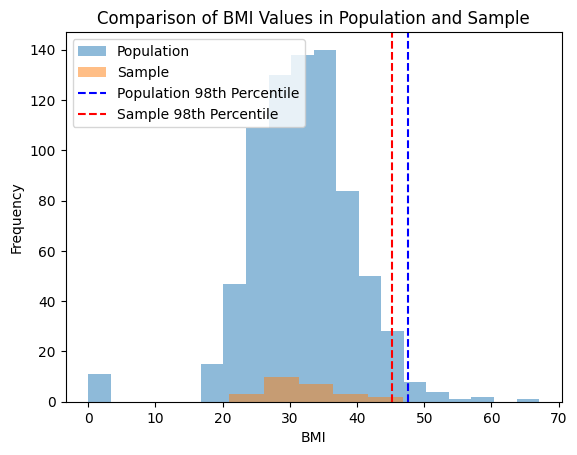

In [8]:
# Create histogram of BMI values in population and sample
fig, ax = plt.subplots()
ax.hist(df['BMI'], alpha=0.5, label='Population', bins=20)
ax.hist(sample['BMI'], alpha=0.5, label='Sample', bins=5)
ax.axvline(population_bmi_98th_percentile, color='blue', linestyle='--', label='Population 98th Percentile')
ax.axvline(sample_bmi_98th_percentile, color='red', linestyle='--', label='Sample 98th Percentile')
ax.set_title('Comparison of BMI Values in Population and Sample')
ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

In [12]:
# Print the 98th percentile of BMI for both the population and the sample
print("Population 98th Percentile BMI:", round(population_bmi_98th_percentile, 2))
print("Sample 98th Percentile BMI:", round(sample_bmi_98th_percentile, 2))

Population 98th Percentile BMI: 47.53
Sample 98th Percentile BMI: 45.26


## Task C

Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [14]:
# Define function to create bootstrap samples and calculate statistics
def bootstrap_stats(data, n_samples=500, sample_size=150):
    means = np.zeros(n_samples)
    stds = np.zeros(n_samples)
    percentiles = np.zeros(n_samples)
    
    for i in range(n_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means[i] = np.mean(sample)
        stds[i] = np.std(sample)
        percentiles[i] = np.percentile(sample, 75)
    
    return means, stds, percentiles

In [15]:
# Create bootstrap samples and calculate statistics for BloodPressure
bp_means, bp_stds, bp_percentiles = bootstrap_stats(df['BloodPressure'])

# Calculate statistics for BloodPressure in the population
pop_bp_mean = np.mean(df['BloodPressure'])
pop_bp_std = np.std(df['BloodPressure'])
pop_bp_percentile = np.percentile(df['BloodPressure'], 75)

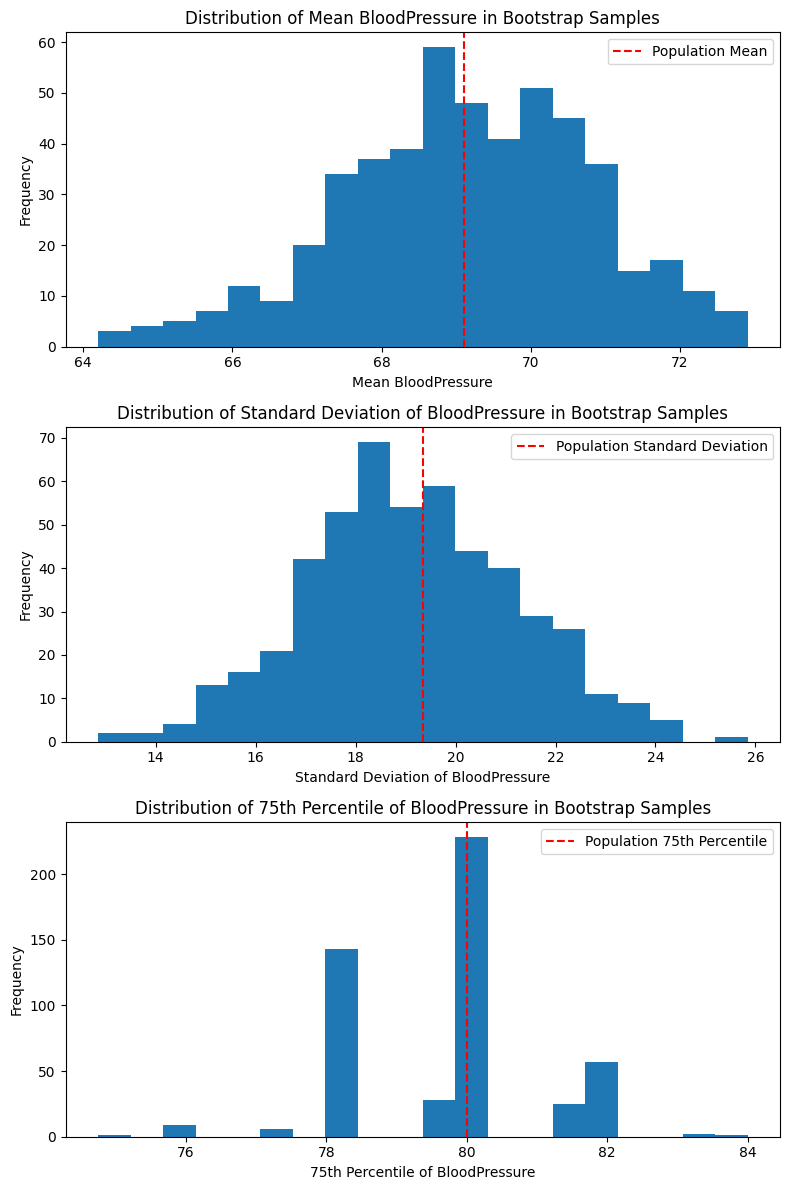

In [16]:
# Create histograms of mean, standard deviation, and percentile of BloodPressure in bootstrap samples
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
axes[0].hist(bp_means, bins=20)
axes[0].axvline(pop_bp_mean, color='red', linestyle='--', label='Population Mean')
axes[0].set_title('Distribution of Mean BloodPressure in Bootstrap Samples')
axes[0].set_xlabel('Mean BloodPressure')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(bp_stds, bins=20)
axes[1].axvline(pop_bp_std, color='red', linestyle='--', label='Population Standard Deviation')
axes[1].set_title('Distribution of Standard Deviation of BloodPressure in Bootstrap Samples')
axes[1].set_xlabel('Standard Deviation of BloodPressure')
axes[1].set_ylabel('Frequency')
axes[1].legend()

axes[2].hist(bp_percentiles, bins=20)
axes[2].axvline(pop_bp_percentile, color='red', linestyle='--', label='Population 75th Percentile')
axes[2].set_title('Distribution of 75th Percentile of BloodPressure in Bootstrap Samples')
axes[2].set_xlabel('75th Percentile of BloodPressure')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()
